In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
#ImageDataGeneration --Data Augmentation --helps to create new images
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#for plotting purpose
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/CarDataset/Train'
valid_path = '/content/drive/MyDrive/CarDataset/Test'


In [4]:
#import the resnet50 library as shown below and add preprocessing layer to the front of ResNet50
#Here we will be using imagenet weights
#(224,224)+3  --  (width,height) + 3 channels for RGB
#include_top=False  -- here we don't include the 1st and last layers
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights = 'imagenet' , include_top = False)

94765736/94765736 [==============================] - 0s 0us/step


In [5]:
#gives summary of our layers in the model

resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [6]:
# we don't need to train all layers.
#we should train only first and last layers
#In 1st layer we should give our own images
#don't train existing weights
for layer in resnet.layers:
    layer.trainable = False


In [7]:
#glob() will tell us how many folders are present in the particular pathwithin the brackets
folders = glob('/content/drive/MyDrive/CarDataset/Train/*')
# edit this with actual path


In [8]:
folders

['/content/drive/MyDrive/CarDataset/Train/matiz red',
 '/content/drive/MyDrive/CarDataset/Train/matiz black',
 '/content/drive/MyDrive/CarDataset/Train/rio blue',
 '/content/drive/MyDrive/CarDataset/Train/tiggo red',
 '/content/drive/MyDrive/CarDataset/Train/tiggo blue',
 '/content/drive/MyDrive/CarDataset/Train/rio red',
 '/content/drive/MyDrive/CarDataset/Train/tiggo black',
 '/content/drive/MyDrive/CarDataset/Train/matiz blue',
 '/content/drive/MyDrive/CarDataset/Train/rio black']

In [9]:
len(folders)

9

In [10]:
#flatten the resnet output
#our layers - you can add more if you want
x = Flatten()(resnet.output)

In [11]:
#activation functio is softmax
#prdiction is the output
#len(folders) = 9 here
#softmax() is a function which will be able to predict multiple categories
prediction = Dense(len(folders) , activation='softmax')(x)

#create a model object
#inputs = input of resnet
#outputs = outputs of resnet(prediction var above)
model = Model(inputs=resnet.input , outputs = prediction)

In [12]:
#tell to the model what cost and optimization method to use
#model.compile()
#compile the model
#After defining the architecture of the neural network, you need to compile it before training it on your data

#loss='categorical_crossentropy'
#This line sets the loss function for the model
#The 'categorical_crossentropy' loss function is commonly used for multi-class classification tasks.
#It calculates the cross-entropy loss between the predicted probability distribution (usually obtained from softmax activation) and the true one-hot encoded labels.

#optimizer='adam'
#This line specifies the optimization algorithm to be used during training
# 'adam' refers to the Adam optimizer, which is a popular optimization algorithm for training neural networks. Adam combines techniques from stochastic gradient descent (SGD) with momentum and RMSprop to adaptively adjust learning rates for each parameter.
#It is known for its efficiency and effectiveness in training deep neural networks.

# metrics=['accuracy']
# Here, you specify the evaluation metric(s) that you want to track during training and validation
#In this case, you are using 'accuracy' as the metric. Accuracy measures the proportion of correctly classified examples in the validation or test set and is a common metric for classification tasks.
#It is calculated as the number of correct predictions divided by the total number of predictions.

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
#view the structure of the model
#since we have input 3 categories in the last layer we can see 3 nodes
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [14]:
#use the ImageDataGenerator to import the images from the dataset
#line imports the ImageDataGenerator class from TensorFlow's Keras module, which is used for data augmentation and preprocessing when working with image data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Setting up the training data generator
train_datagen = ImageDataGenerator(rescale = 1./255, # Rescale pixel values to a range of [0, 1]
                                  shear_range = 0.2, # Randomly apply shearing transformation
                                  zoom_range = 0.2,  # Randomly apply zooming transformation
                                  horizontal_flip = True) # Randomly flip images horizontally

#Setting up the test data generator
#For the test data generator, only the rescale parameter is specified. This is because data augmentation techniques like shearing, zooming, and flipping should not be applied to the test dataset. The test dataset should remain as it is to evaluate the model's performance on real, unaltered data.
test_datagen = ImageDataGenerator(rescale = 1./255)

#rescale: Rescaling is a common preprocessing step where you scale the pixel values of the images to be in the range [0, 1] by dividing each pixel value by 255. This helps in better convergence during training.
    #shear_range, zoom_range, and horizontal_flip: These are data augmentation techniques applied to the training images. Data augmentation helps increase the diversity of the training data, which can improve the model's ability to generalize to new, unseen data.
       # shear_range: It applies random shearing transformations to the images. Shearing involves shifting one part of the image in one direction while keeping the other parts fixed, resulting in a diagonal deformation.
        #zoom_range: It applies random zooming transformations to the images. Zooming either magnifies or shrinks a portion of the image.
        #horizontal_flip: It randomly flips (mirrors) images horizontally, which can be useful for tasks where the orientation of objects doesn't matter, like object recognition.

In [15]:
#make sure you provide the same target size as initiated for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CarDataset/Train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

#train_datagen - a data augmentation and preprocessing generator, which is typically used to apply various transformations to the input images during training to improve the model's performance.
#flow_from_directory - a method provided by Keras' ImageDataGenerator class, which is used for loading and augmenting images from a directory. It generates batches of augmented data.
#target_size -  specifies the dimensions to which the input images will be resized.(should be similar to previous img)
#batch_size - determines the number of images that will be processed in each iteration during training. In this case, 32 images will be processed together before updating the model's weights.
#class_mode -  specifies how the class labels for the images should be encoded. In this case, it's set to 'categorical', which means that the class labels are one-hot encoded. Each image in the dataset belongs to a single class, and this mode is suitable for multi-class classification problems.

Found 2324 images belonging to 9 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CarDataset/Test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 270 images belonging to 9 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r=model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/50
73/73 [==============================] - 618s 8s/step - loss: 6.3663 - accuracy: 0.1562 - val_loss: 2.8126 - val_accuracy: 0.2481
Epoch 2/50
73/73 [==============================] - 44s 604ms/step - loss: 2.2870 - accuracy: 0.2569 - val_loss: 2.6711 - val_accuracy: 0.2852
Epoch 3/50
73/73 [==============================] - 43s 593ms/step - loss: 2.2659 - accuracy: 0.2939 - val_loss: 1.9271 - val_accuracy: 0.4000
Epoch 4/50
73/73 [==============================] - 44s 598ms/step - loss: 2.0457 - accuracy: 0.3662 - val_loss: 3.1007 - val_accuracy: 0.3074
Epoch 5/50
73/73 [==============================] - 44s 609ms/step - loss: 2.1049 - accuracy: 0.3559 - val_loss: 2.2143 - val_accuracy: 0.3185
Epoch 6/50
73/73 [==============================] - 43s 591ms/step - loss: 1.8838 - accuracy: 0.3894 - val_loss: 2.1230 - val_accuracy: 0.3556
Epoch 7/50
73/73 [==============================] - 46s 625ms/step - loss: 2.2228 - accuracy: 0.3748 - val_loss: 2.6109 - val_accuracy: 0.2963
E

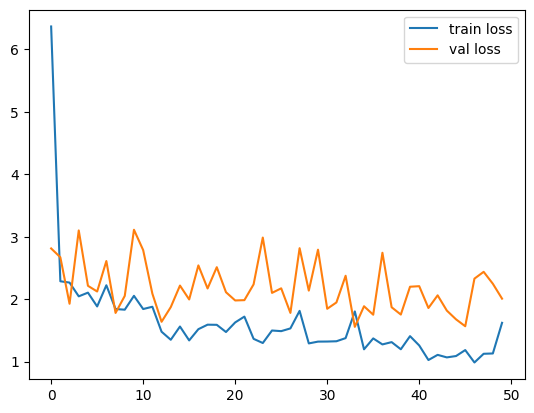

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#code is used for plotting and visualizing the training and validation loss curves of a deep learning model using Matplotlib. It also attempts to save the plot as an image file.

#plt.plot(r.history['loss'], label='train loss')
   #     This line uses Matplotlib's plot function to plot the training loss over the training epochs. r.history['loss'] is assumed to contain a list of training loss values recorded during each training epoch.

    #plt.plot(r.history['val_loss'], label='val loss')
     #   This line plots the validation loss over the training epochs. r.history['val_loss'] is assumed to contain a list of validation loss values recorded during each epoch. Validation loss is used to monitor how well the model is generalizing to unseen data.

    #plt.legend()
     #   This line adds a legend to the plot, labeling the training loss curve as 'train loss' and the validation loss curve as 'val loss'. The legend helps identify which curve corresponds to which type of loss.

    #plt.show()
     #   This line displays the plot on the screen. It is necessary to visualize the loss curves during or after training.

    #plt.savefig('AccVal_acc')
     #   This line attempts to save the current plot as an image file with the filename 'AccVal_acc'. However, there is an issue with the placement of this line. It should be placed before plt.show() because plt.show() displays the plot and prevents further code execution.
      #  If you want to save the plot as an image, move this line above plt.show().



In [19]:
# save it as a h5 file

from tensorflow.keras.models import load_model

# 'model' is your trained ResNet50 model above
model.save('model_resnet501.h5')

#Make sure that you run this code after you have trained your model. It will save the entire model, including its architecture, weights, optimizer state, and other configurations, to a file named 'model_resnet50.h5' in the current working directory or the specified path.
# You can later load this model using the load_model function if needed.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
#The code is using a trained model (model) to make predictions on a dataset (test_set) using the predict method.

y_pred = model.predict(test_set)


9/9 [==============================] - 2s 171ms/step


In [21]:
y_pred

array([[2.4050535e-01, 4.4705842e-02, 6.9006717e-01, ..., 2.9500129e-04,
        2.1058787e-07, 5.0495757e-04],
       [5.9620410e-01, 2.7768074e-02, 1.4940294e-05, ..., 3.3019349e-01,
        3.7866091e-06, 2.1323700e-04],
       [3.4478505e-03, 8.3606017e-01, 1.9515816e-03, ..., 3.3913434e-02,
        2.6544773e-03, 1.7241422e-02],
       ...,
       [9.0887792e-05, 2.3935251e-03, 9.2769619e-03, ..., 3.7496513e-01,
        1.0096276e-03, 1.2715979e-01],
       [2.5238191e-06, 1.6820369e-03, 2.2946435e-06, ..., 4.2090198e-04,
        2.5416474e-04, 2.9722531e-03],
       [4.6552204e-10, 5.3590333e-07, 4.3102242e-02, ..., 7.7831704e-04,
        2.3676868e-08, 9.3140233e-01]], dtype=float32)

In [22]:
#you're using the NumPy library in Python to work with an array called y_pred and you want to find the index (or class) with the highest predicted value along axis 1.
import numpy as np

# Find the class with the highest probability for each sample
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 0, 1, 4, 6, 6, 4, 4, 8, 6, 8, 1, 5, 5, 0, 8, 5, 8, 4, 4, 0, 1,
       5, 1, 4, 1, 8, 4, 5, 8, 3, 8, 1, 3, 6, 4, 4, 6, 1, 4, 1, 5, 6, 4,
       8, 4, 6, 6, 1, 1, 5, 6, 8, 2, 1, 3, 5, 2, 8, 5, 8, 6, 1, 6, 8, 5,
       2, 8, 2, 4, 8, 8, 5, 5, 8, 5, 1, 5, 8, 2, 8, 5, 2, 7, 1, 6, 7, 1,
       5, 1, 4, 5, 2, 8, 3, 6, 4, 4, 0, 5, 1, 4, 5, 4, 4, 8, 6, 2, 0, 4,
       1, 4, 4, 8, 5, 2, 2, 0, 8, 4, 3, 8, 1, 2, 4, 6, 6, 6, 1, 6, 8, 2,
       4, 8, 8, 3, 5, 8, 3, 4, 1, 1, 2, 8, 4, 6, 4, 1, 8, 5, 4, 4, 6, 4,
       5, 6, 1, 5, 7, 1, 2, 0, 1, 5, 8, 4, 8, 8, 6, 8, 8, 4, 4, 6, 6, 4,
       6, 3, 4, 5, 4, 8, 4, 5, 1, 5, 8, 5, 8, 8, 8, 5, 1, 6, 6, 1, 0, 3,
       1, 5, 4, 4, 1, 4, 4, 6, 0, 1, 4, 8, 6, 4, 4, 6, 8, 8, 2, 4, 5, 2,
       5, 5, 0, 2, 8, 4, 4, 5, 1, 2, 6, 0, 2, 6, 4, 6, 4, 6, 1, 2, 8, 1,
       6, 6, 6, 4, 1, 5, 0, 4, 2, 5, 2, 6, 5, 7, 5, 8, 4, 8, 5, 8, 5, 4,
       8, 1, 2, 4, 4, 8])

In [24]:

#This module is used for loading pre-trained or saved Keras models.

from tensorflow.keras.models import load_model

#This module is used for image preprocessing and augmentation when working with image data.
#It provides functions and classes to load, preprocess, and augment images before feeding them into deep learning models built using TensorFlow's Keras API.
#Common functions include load_img, img_to_array, array_to_img, etc., which help in loading and converting images to NumPy arrays suitable for feeding into a neural network.

from tensorflow.keras.preprocessing import image

In [25]:
# Load a pre-trained model

model = load_model('model_resnet501.h5')

#we can use the loaded model for inference or further training

In [26]:
# print the img_data
img_data

NameError: ignored

In [27]:
# To load an image file from the path within brackets and resize it to the target size(load_img function from TensorFlow's Keras preprocessing module )
img=image.load_img('/content/drive/MyDrive/CarDataset/Test/rio blue/000009.jpg',target_size=(224,224))

In [28]:
image

<module 'tensorflow.keras.preprocessing.image' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/preprocessing/image/__init__.py'>

In [29]:
# image.img_to_array(img): This function takes an image object (typically loaded using image.load_img) as input and converts it into a NumPy array.
# variable x will contain a NumPy array representing the image.
x=image.img_to_array(img)

# print the x
x

array([[[182., 169., 161.],
        [177., 173., 162.],
        [180., 178., 166.],
        ...,
        [172., 172., 184.],
        [173., 172., 186.],
        [174., 173., 189.]],

       [[207., 186., 181.],
        [192., 177., 170.],
        [191., 178., 170.],
        ...,
        [173., 173., 185.],
        [174., 173., 187.],
        [175., 174., 190.]],

       [[199., 171., 167.],
        [197., 172., 167.],
        [193., 170., 164.],
        ...,
        [173., 173., 185.],
        [174., 173., 187.],
        [175., 174., 190.]],

       ...,

       [[114., 109., 115.],
        [117., 111., 115.],
        [122., 113., 116.],
        ...,
        [195., 208., 224.],
        [192., 205., 222.],
        [190., 203., 219.]],

       [[113., 108., 114.],
        [116., 110., 114.],
        [121., 112., 115.],
        ...,
        [191., 204., 220.],
        [190., 203., 220.],
        [188., 201., 217.]],

       [[113., 108., 114.],
        [116., 110., 114.],
        [119., 1

In [30]:
#The x.shape attribute is used to determine the shape or dimensions of a NumPy array
#The shape typically consists of three values: (height, width, channels) for a color image or just (height, width) for a grayscale image.
#If it's a color image, the shape will be something like (224, 224, 3), indicating a 224x224 image with 3 channels (Red, Green, Blue).
#If grayscale image output(224,224) with 1 channel

x.shape

(224, 224, 3)

In [31]:
# previously we have done rescaling for all the test dataset images.so,we have to do to the new images also
x=x/255
# print x
x

array([[[0.7137255 , 0.6627451 , 0.6313726 ],
        [0.69411767, 0.6784314 , 0.63529414],
        [0.7058824 , 0.69803923, 0.6509804 ],
        ...,
        [0.6745098 , 0.6745098 , 0.72156864],
        [0.6784314 , 0.6745098 , 0.7294118 ],
        [0.68235296, 0.6784314 , 0.7411765 ]],

       [[0.8117647 , 0.7294118 , 0.70980394],
        [0.7529412 , 0.69411767, 0.6666667 ],
        [0.7490196 , 0.69803923, 0.6666667 ],
        ...,
        [0.6784314 , 0.6784314 , 0.7254902 ],
        [0.68235296, 0.6784314 , 0.73333335],
        [0.6862745 , 0.68235296, 0.74509805]],

       [[0.78039217, 0.67058825, 0.654902  ],
        [0.77254903, 0.6745098 , 0.654902  ],
        [0.75686276, 0.6666667 , 0.6431373 ],
        ...,
        [0.6784314 , 0.6784314 , 0.7254902 ],
        [0.68235296, 0.6784314 , 0.73333335],
        [0.6862745 , 0.68235296, 0.74509805]],

       ...,

       [[0.44705883, 0.42745098, 0.4509804 ],
        [0.45882353, 0.43529412, 0.4509804 ],
        [0.47843137, 0

In [32]:
#preparing the image data for use with a deep learning model, likely one that uses the Keras framework.
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape                # to check the shape of the preprocessed image data.

#x = np.expand_dims(x, axis=0): This line uses NumPy's np.expand_dims function to add an extra dimension to your image data x. This is often done to convert a single image (which is typically 3D) into a batch of images with a batch size of 1. The axis=0 argument indicates that you want to add the new dimension as the first dimension. After this line, x will become a 4D NumPy array.

#img_data = preprocess_input(x): This line seems to be using a preprocessing function called preprocess_input on your image data x. The specific preprocessing steps depend on the model and framework you are using. It's common to apply preprocessing to normalize the pixel values or perform other operations required by the model. The result is stored in the variable img_data.

#Finally, img_data.shape is used to check the shape of the preprocessed image data. The shape will depend on the preprocessing steps applied, but it will typically be something like (1, height, width, channels) if you expanded a single image into a batch with a batch size of 1.


(1, 224, 224, 3)

In [33]:
#used to make predictions on the input data (img_data) using a pre-trained deep learning model.
model.predict(img_data)

# model: This should be a pre-trained deep learning model that you have loaded or created earlier using TensorFlow's Keras API. The model is capable of performing various tasks such as image classification, object detection, etc., depending on how it was trained.

 #   img_data: This is the input data, typically a preprocessed image or a batch of preprocessed images, that you want to pass to the model for prediction. In your case, it seems to be the result of preprocessing a single image and expanding its dimensions, so it's a 4D NumPy array.

# When you call model.predict(img_data), the model uses its learned weights and architecture to make predictions based on the input data. The output of this operation will be the model's predictions for the provided input data. The shape and content of the predictions will depend on the specific model and task you are working on.

# For example, if you are using an image classification model, the output might be a probability distribution over classes, indicating the likelihood of each class for the given input. You can then extract information from the predictions, such as the predicted class label or class probabilities, to interpret the model's output.


1/1 [==============================] - 1s 1s/step


array([[7.1439388e-07, 1.4447624e-17, 2.0207425e-20, 9.9999928e-01,
        3.1759108e-35, 3.4808564e-17, 1.2355367e-22, 1.6614970e-25,
        2.4269390e-29]], dtype=float32)

In [34]:
# used to obtain the predicted class labels from the output of a deep learning model for a given input (img_data).
a=np.argmax(model.predict(img_data), axis=1)

# model.predict(img_data): This part of the code uses the pre-trained deep learning model (model) to make predictions on the input data (img_data). The output of this operation is a prediction, which typically includes a probability distribution over classes for each input.

 #   np.argmax(...): After making predictions, np.argmax is used to find the index (or class label) corresponding to the highest predicted probability for each input in the batch. The axis=1 argument specifies that the maximum value should be found along the second axis, which corresponds to the classes.

  #  a = ...: The result of np.argmax(model.predict(img_data), axis=1) is assigned to the variable a, so a will contain an array of predicted class labels for the inputs in img_data.


1/1 [==============================] - 0s 25ms/step


In [35]:
# print a(a will be an array of these predicted class labels)
a

array([3])